# EDA Team 2 graduation by zone

In [1]:
import pandas as pd
import numpy as np

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

#statistics

import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.formula.api as sm

#warnings

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('graduation-rate.csv')
df.head()

,Year,Zone_EN,Coordinates,School_Type_EN,School_Stage_EN,Gender_EN,Unnamed: 6,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Expat,8,243,251,96.81%
1,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Local,20,353,373,94.64%
2,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Expat,28,182,210,86.67%
3,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Local,23,262,285,91.93%
4,2015,Ajman,"25.244000,55.266140",Private Schools,Cycle 3,Female,NaN,Expat,11,424,435,97.47%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       401 non-null    int64  
 1   Zone_EN                    401 non-null    object 
 2   Coordinates                333 non-null    object 
 3   School_Type_EN             401 non-null    object 
 4   School_Stage_EN            401 non-null    object 
 5   Gender_EN                  401 non-null    object 
 6   Unnamed: 6                 0 non-null      float64
 7   LocalFlag_EN               401 non-null    object 
 8   Number of Failed students  401 non-null    int64  
 9   Number of Pass students    401 non-null    int64  
 10  Total Number of Students   401 non-null    int64  
 11  Graduation %               401 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 37.7+ KB


In [4]:
df = df.drop([ "School_Stage_EN", "Unnamed: 6","Graduation %"], axis=1)
df.head()

,Year,Zone_EN,Coordinates,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students
0,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Expat,8,243,251
1,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Local,20,353,373
2,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Expat,28,182,210
3,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Local,23,262,285
4,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Expat,11,424,435


In [5]:
# Checking null values:

print(df.isnull().sum())

Year                          0
Zone_EN                       0
Coordinates                  68
School_Type_EN                0
Gender_EN                     0
LocalFlag_EN                  0
Number of Failed students     0
Number of Pass students       0
Total Number of Students      0
dtype: int64


In [6]:
df=df.rename(columns={'Zone_EN':'Zone', 'School_Type_EN':'School_Type','LocalFlag_EN':'LocalFlag','Gender_EN':'Gender' })
df.columns


Index(['Year', 'Zone', 'Coordinates', 'School_Type', 'Gender', 'LocalFlag',
       'Number of Failed students', 'Number of Pass students',
       'Total Number of Students'],
      dtype='object')

In [7]:
df['Graduation']=df['Number of Pass students']/df['Total Number of Students']
df.head(10)

,Year,Zone,Coordinates,School_Type,Gender,LocalFlag,Number of Failed students,Number of Pass students,Total Number of Students,Graduation
0,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Expat,8,243,251,0.968127
1,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Local,20,353,373,0.946381
2,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Expat,28,182,210,0.866667
3,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Local,23,262,285,0.919298
4,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Expat,11,424,435,0.974713
5,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Local,0,13,13,1.000000
6,2015,Ajman,"25.244000,55.266140",Private Schools,Male,Expat,42,535,577,0.927210
7,2015,Ajman,"25.244000,55.266140",Private Schools,Male,Local,16,58,74,0.783784
8,2015,Ajman,"25.244000,55.266140",Continuing Education Centers,Female,Expat,26,50,76,0.657895
9,2015,Ajman,"25.244000,55.266140",Continuing Education Centers,Female,Local,35,48,83,0.578313


**Histogram of Numeric Varients**

In [8]:
fig = make_subplots(rows=2, cols=3, vertical_spacing=0.2,subplot_titles=['Year', 'Zone', 'School type', 'Gender', 'Localflag'])
trace1=go.Histogram(x=df['Year'])
fig.add_trace(trace1, row=1, col=1)
trace2=go.Histogram(x=df['Zone'])
fig.add_trace(trace2, row=1, col=2)
trace3=go.Histogram(x=df['School_Type'])
fig.add_trace(trace3, row=1, col=3)
trace4=go.Histogram(x=df['Gender'])
fig.add_trace(trace4, row=2, col=1)
trace5=go.Histogram(x=df['LocalFlag'])
fig.add_trace(trace5, row=2, col=2)
fig.update_layout(title=' Histograms', bargap=0.2 , height=700, width=950, showlegend=False)
fig.show()

In [9]:
df1=df.groupby('Year')['Graduation'].mean()
df1=df1.reset_index()
df2=df.groupby('Zone')['Graduation'].mean()
df2=df2.reset_index()
df3=df.groupby('School_Type')['Graduation'].mean()
df3=df3.reset_index()
df4=df.groupby('Gender')['Graduation'].mean()
df4=df4.reset_index()
df5=df.groupby('LocalFlag')['Graduation'].mean()
df5=df5.reset_index()

fig = make_subplots(rows=2, cols=3, vertical_spacing=0.2,subplot_titles=['Year', 'Zone', 'School type', 'Gender', 'Localflag'])

trace1 = go.Bar(x=df1['Year'], y=df1['Graduation'])
fig.add_trace(trace1, row=1, col=1)

trace2 = go.Bar(x=df2['Zone'], y=df2['Graduation'])
fig.add_trace(trace2, row=1, col=2)

trace3 = go.Bar(x=df3['School_Type'], y=df3['Graduation'])
fig.add_trace(trace3, row=1, col=3)

trace4 = go.Bar(x=df4['Gender'], y=df4['Graduation'])
fig.add_trace(trace4, row=2, col=1)

trace5 = go.Bar(x=df5['LocalFlag'], y=df5['Graduation'])
fig.add_trace(trace5, row=2, col=2)


fig.update_layout(title='Bar Graphs', bargap=0.2 , height=700, width=950, showlegend=False)
fig.show()





**correlation**

In [10]:
# Finding correlation between numeric features:

numeric_columns = ["Number of Failed students", "Number of Pass students", "Total Number of Students", "Graduation"]
df_corr = df[numeric_columns].corr()
df_corr

,Number of Failed students,Number of Pass students,Total Number of Students,Graduation
Number of Failed students,1.000000,0.214411,0.265374,-0.513673
Number of Pass students,0.214411,1.000000,0.998622,0.237703
Total Number of Students,0.265374,0.998622,1.000000,0.207038
Graduation,-0.513673,0.237703,0.207038,1.000000


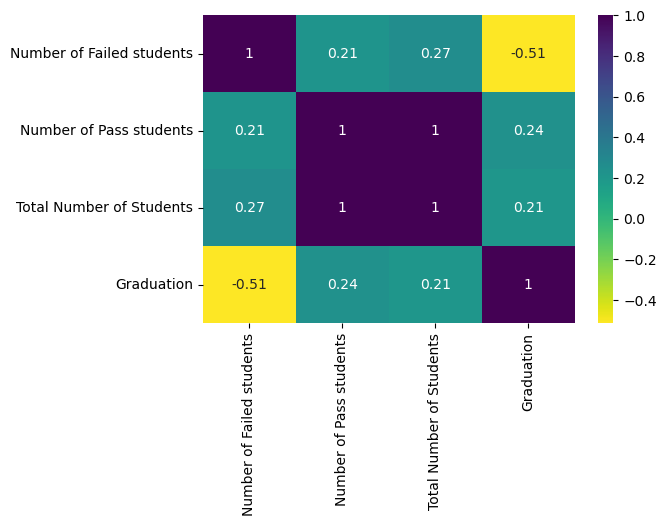

In [11]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize = (6,4))
sns_plot=sns.heatmap(corr_matrix,annot=True, cmap='viridis_r')
plt.show()

In [12]:
df_corr["Graduation"].sort_values(ascending=False)

Graduation                   1.000000
Number of Pass students      0.237703
Total Number of Students     0.207038
Number of Failed students   -0.513673
Name: Graduation, dtype: float64

In [13]:
df_corr["Total Number of Students"].sort_values(ascending=False)

Total Number of Students     1.000000
Number of Pass students      0.998622
Number of Failed students    0.265374
Graduation                   0.207038
Name: Total Number of Students, dtype: float64

In [14]:
df_corr["Number of Pass students"].sort_values(ascending=False)

Number of Pass students      1.000000
Total Number of Students     0.998622
Graduation                   0.237703
Number of Failed students    0.214411
Name: Number of Pass students, dtype: float64

In [15]:
df_corr["Number of Failed students"].sort_values(ascending=False)

Number of Failed students    1.000000
Total Number of Students     0.265374
Number of Pass students      0.214411
Graduation                  -0.513673
Name: Number of Failed students, dtype: float64

In [16]:
#dummies = pd.get_dummies(df['Zone'], drop_first = True)
#df = pd.concat([df, dummies], axis = 1)
#df = df.drop(["Zone"], axis=1)

# Anova and Chi-Square

In [33]:
correlation_coefficient, p_value = stats.pearsonr(df['Year'], df['Graduation'])
print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.15355979275361556
Valor p: 0.002044142655339035


In [34]:
result1 = stats.f_oneway(
    df[df['Zone'] == 'Ajman']['Graduation'],
    df[df['Zone'] == 'DUBAI']['Graduation'],
    df[df['Zone'] == 'Fujairah']['Graduation'],
    df[df['Zone'] == 'Sharjah']['Graduation'],
    df[df['Zone'] == 'Ras AlKhaima']['Graduation'],
    df[df['Zone'] == 'Umm AlQuwain']['Graduation']
)
print("Estadístico F:", result1.statistic)
print("Valor p:", result1.pvalue)

Estadístico F: 1.0913953156522453
Valor p: 0.3645529779367496


In [37]:
result2 = stats.f_oneway(
    df[df['School_Type'] == 'Public Schools']['Graduation'],
    df[df['School_Type'] == 'Continuing Education Centers']['Graduation'],
    df[df['School_Type'] == 'Private Schools']['Graduation'],
    df[df['School_Type'] == 'ACTVET']['Graduation']
)
print("Estadístico F:", result2.statistic)
print("Valor p:", result2.pvalue)

Estadístico F: 267.6254800156254
Valor p: 5.844709192104647e-95


In [40]:
result3 = stats.f_oneway(
    df[df['Gender'] == 'Male']['Graduation'],
    df[df['Gender'] == 'Female']['Graduation']
)
print("Estadístico F:", result3.statistic)
print("Valor p:", result3.pvalue)

Estadístico F: 0.33609149483431683
Valor p: 0.5624212170810048


In [42]:
result4 = stats.f_oneway(
    df[df['LocalFlag'] == 'Local']['Graduation'],
    df[df['LocalFlag'] == 'Expat']['Graduation']
)
print("Estadístico F:", result4.statistic)
print("Valor p:", result4.pvalue)

Estadístico F: 0.927266940969793
Valor p: 0.33615733762072
